<a href="https://colab.research.google.com/github/esrayuzgec/AlzheimerDetection/blob/main/AlzheimersDetection4class_RESNEXT101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esrayuzgec","key":"2c0e73f0e1cea2d8f9e56fba987e2376"}'}

In [ ]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images


 26% 9.00M/34.1M [00:00<00:01, 16.4MB/s]
100% 34.1M/34.1M [00:00<00:00, 53.9MB/s]


In [ ]:
from zipfile import ZipFile
file_name="alzheimers-dataset-4-class-of-images.zip"

In [ ]:
with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')

done


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 30.4 MB/s 
     |████████████████████████████████| 197 kB 66.4 MB/s 
     |████████████████████████████████| 362 kB 70.9 MB/s 
     |████████████████████████████████| 4.2 MB 67.0 MB/s 
     |████████████████████████████████| 1.2 MB 30.8 MB/s 
     |████████████████████████████████| 60 kB 7.8 MB/s 
     |████████████████████████████████| 140 kB 72.0 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 1.1 MB 55.3 MB/s 
     |████████████████████████████████| 212 kB 72.0 MB/s 
     |████████████████████████████████| 596 kB 59.9 MB/s 
     |████████████████████████████████| 127 kB 72.3 MB/s 
     |████████████████████████████████| 94 kB 3.9 MB/s 
     |████████████████████████████████| 271 kB 69.9 MB/s 
     |████████████████████████████████| 144 kB 77.5 MB/s 
     |████████████████████████████████| 6.6 MB 51.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
import PIL

In [ ]:
train_dspath=Path("/content/Alzheimer_s Dataset/train")
train_dspath.ls()

(#4) [Path('/content/Alzheimer_s Dataset/train/NonDemented'),Path('/content/Alzheimer_s Dataset/train/VeryMildDemented'),Path('/content/Alzheimer_s Dataset/train/MildDemented'),Path('/content/Alzheimer_s Dataset/train/ModerateDemented')]

In [ ]:
train_imfiles=get_image_files(train_dspath)

In [ ]:
im=PILImage.create(train_imfiles[0])
im.shape

(208, 176)

In [ ]:
augments=[RandomResizedCrop(size=224, min_scale=0.75), Rotate(), Zoom()]
item_tfms=Resize(128,method='squish')

In [ ]:
brains=DataBlock(blocks=(ImageBlock,CategoryBlock),
                 get_y=parent_label,
                 batch_tfms=augments,
                 item_tfms=item_tfms,
                 splitter=RandomSplitter(valid_pct=0.2,seed=23)
                 
                 
                 )

In [ ]:
dls=brains.dataloaders(train_imfiles,bs=64)

In [ ]:
dls.c,len(dls.train_ds),len(dls.valid_ds)#valid ve train data sayımız

(4, 4097, 1024)

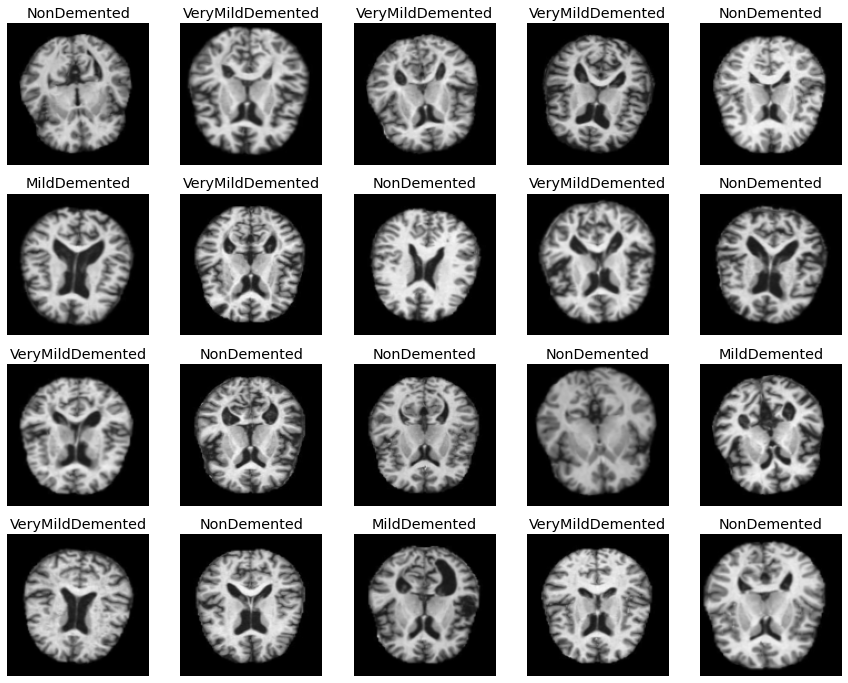

In [ ]:
dls.show_batch(max_n=20)

In [ ]:
from torchvision.models.resnet import resnext101_32x8d
learn=cnn_learner(dls,resnext101_32x8d,metrics=[accuracy,error_rate])

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth" to /root/.cache/torch/hub/checkpoints/resnext101_32x8d-8ba56ff5.pth


  0%|          | 0.00/340M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0020892962347716093)

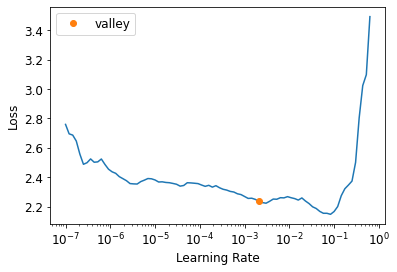

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(100,2.2e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,182.975861,164.497253,0.263672,0.736328,00:52
1,153.047699,104.963493,0.302734,0.697266,00:52
2,86.128372,39.648766,0.446289,0.553711,00:52
3,46.897038,23.046816,0.549805,0.450195,00:52
4,26.834572,11.473409,0.540039,0.459961,00:52
5,15.046320,7.407721,0.614258,0.385742,00:52
6,7.943111,3.775548,0.683594,0.316406,00:52
7,5.479788,2.475851,0.739258,0.260742,00:52
8,3.592335,1.458993,0.763672,0.236328,00:52
9,2.959717,2.423243,0.731445,0.268555,00:52


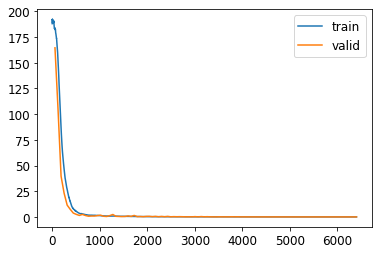

In [ ]:
learn.recorder.plot_loss()

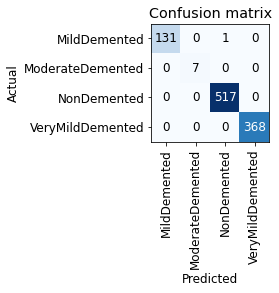

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

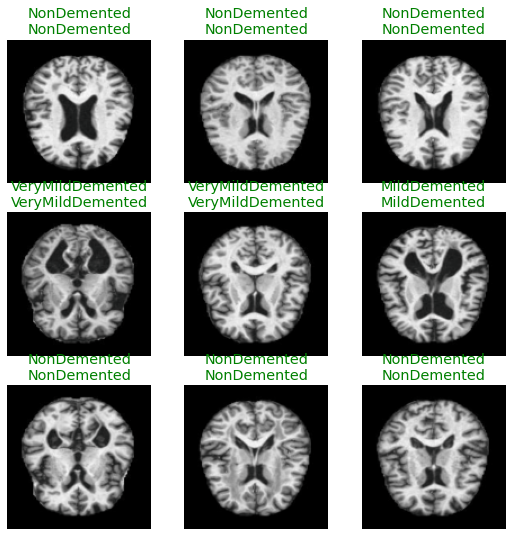

In [ ]:
learn.show_results()

In [ ]:
learn.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 128 x 128 
Conv2d                                    1792       False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36928      False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 64 x 64   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 128 x 64 x 64  
Conv2d                                    73856      False     
BatchNorm2d                               256        True      
ReLU                               

In [ ]:
interp.print_classification_report()

                  precision    recall  f1-score   support

    MildDemented       0.99      0.99      0.99       132
ModerateDemented       1.00      1.00      1.00         7
     NonDemented       0.99      1.00      1.00       517
VeryMildDemented       1.00      0.99      0.99       368

        accuracy                           0.99      1024
       macro avg       1.00      0.99      1.00      1024
    weighted avg       0.99      0.99      0.99      1024



In [ ]:
from fastai.vision.widgets import * 
from fastai.vision.all import *
from PIL import Image, ImageOps, ImageEnhance, __version__ as PILLOW_VERSION

In [ ]:
btn_upload=widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

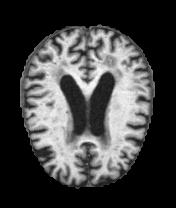

In [ ]:
img=PILImage.create(btn_upload.data[-1])
img

In [ ]:
learn.predict(img)[0]

'VeryMildDemented'